In order to establish a good calibration, a good initial condition has to be established. This implies, ideally, that we know ...

- For every metapopulation state,
- For every age class, and
- For every region

... how many subjects are in it at the start time of the calibration. For the start of the pandemic, the spectrum of choices is rather limited, because it only depends on how many and where people are in the Exposed state. Deciding on the initial condition of calibrations starting in the middle of the pandemic is more difficult.

It is _not_ sufficient just to know how many people are hospitalised, because the content of other states in the future of the simulation is determined by the content of previous states, through the coupled differential equations. We could estimate the content of all other states, but this is difficult and imprecise.

Instead, we will rely on the outcome of a previous calibration, given that this calibration neatly describes the data. This results in an initial condition that must resemble reality - otherwise it wouldn't have described the data in the past so well. If, however, the best-fit calibration result does not ideally describe the data, one could manually adjust the time-dependent social contact behaviour until a near-perfect match is made. (Note: the reason this is not done in the calibration itself, is because it doesn't really teach the user much.)

For the national model, this may be a tedious but certainly not a difficult excercise. For the spatially explicit model, things get more complicated, because just playing around with the social contact behaviour will not suffice to get all $G$ time series to more or less fit the data. See e.g. the time series for Belgium, Brussels and Antwerp (from the same manual fiddling):

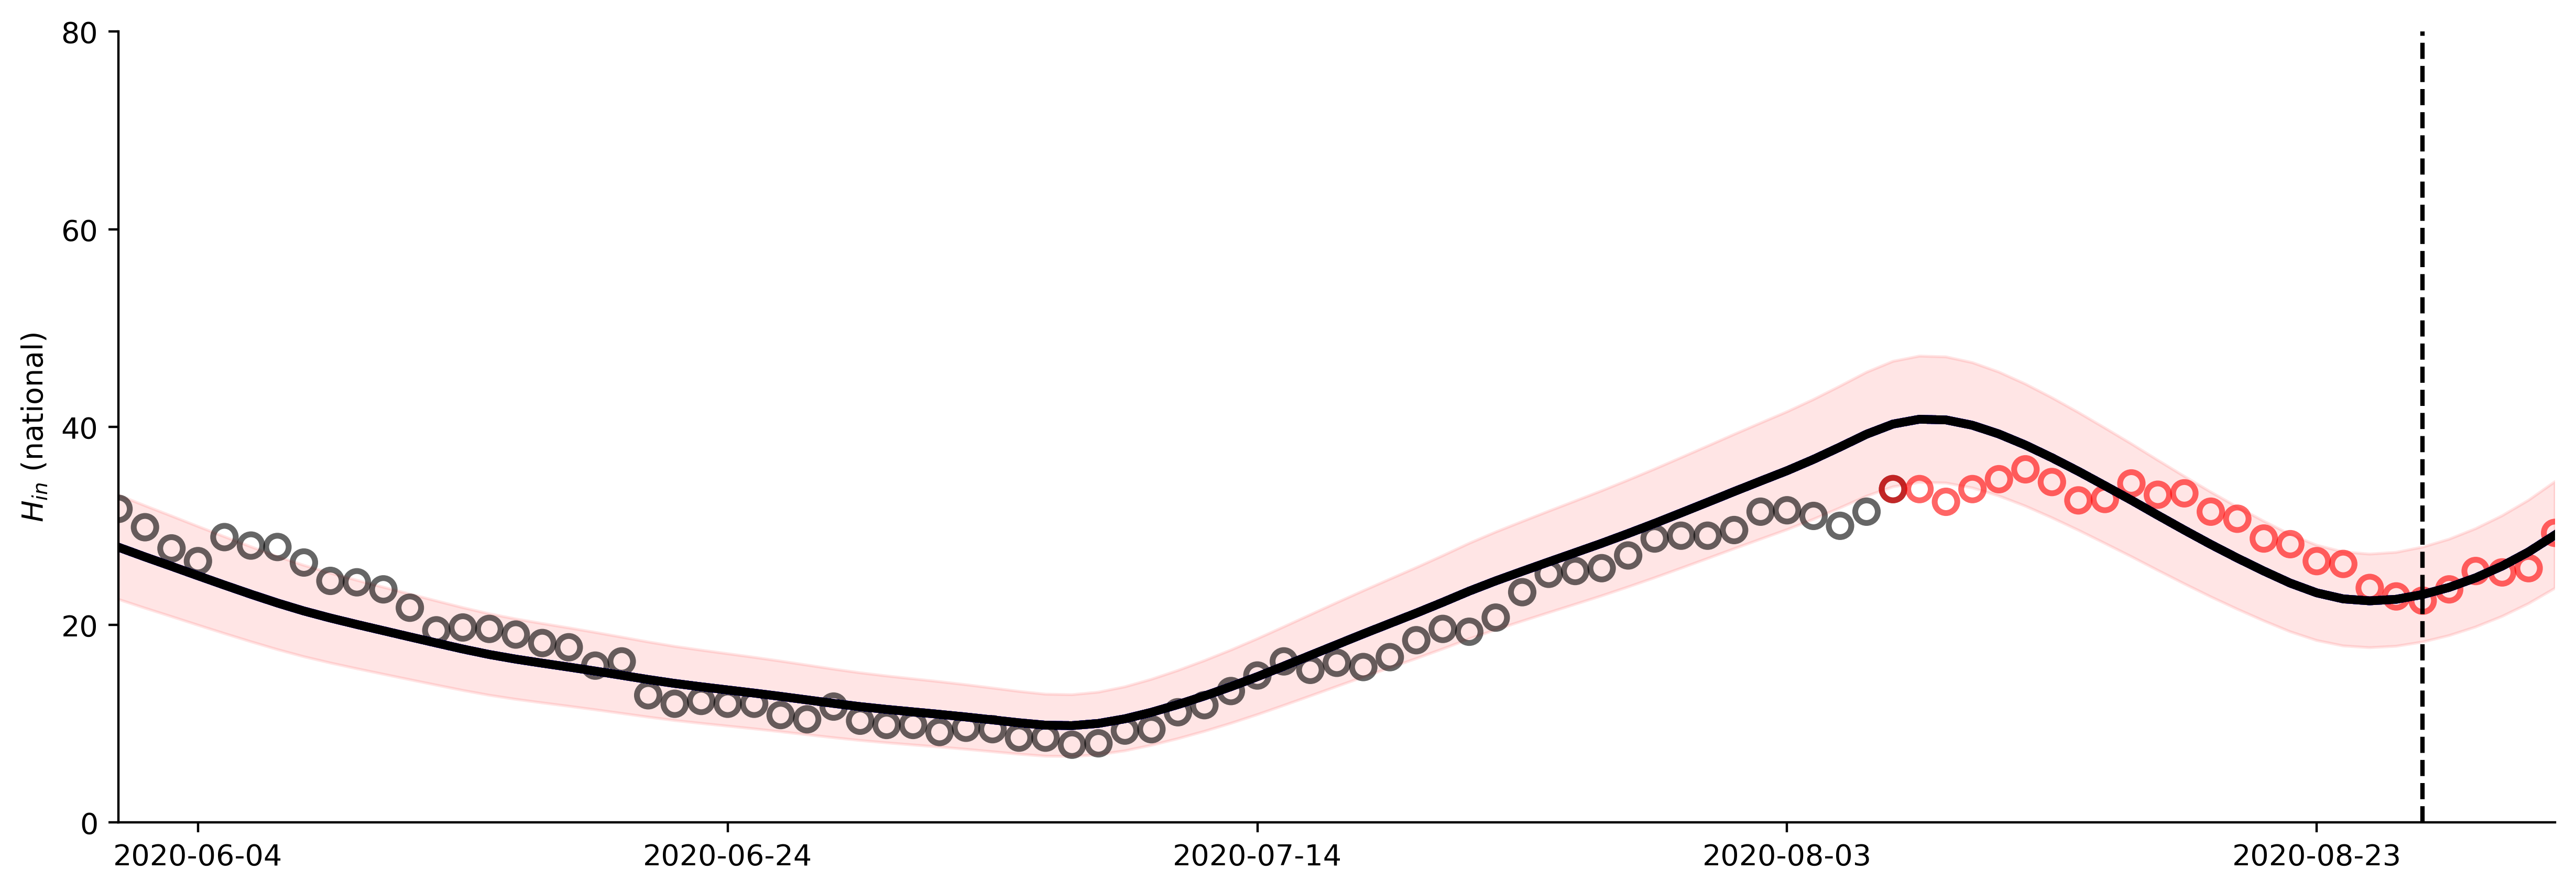

In [11]:
# The national data fit rather well

from IPython.display import Image
Image(filename='../calibration/summer-bump_national.png')

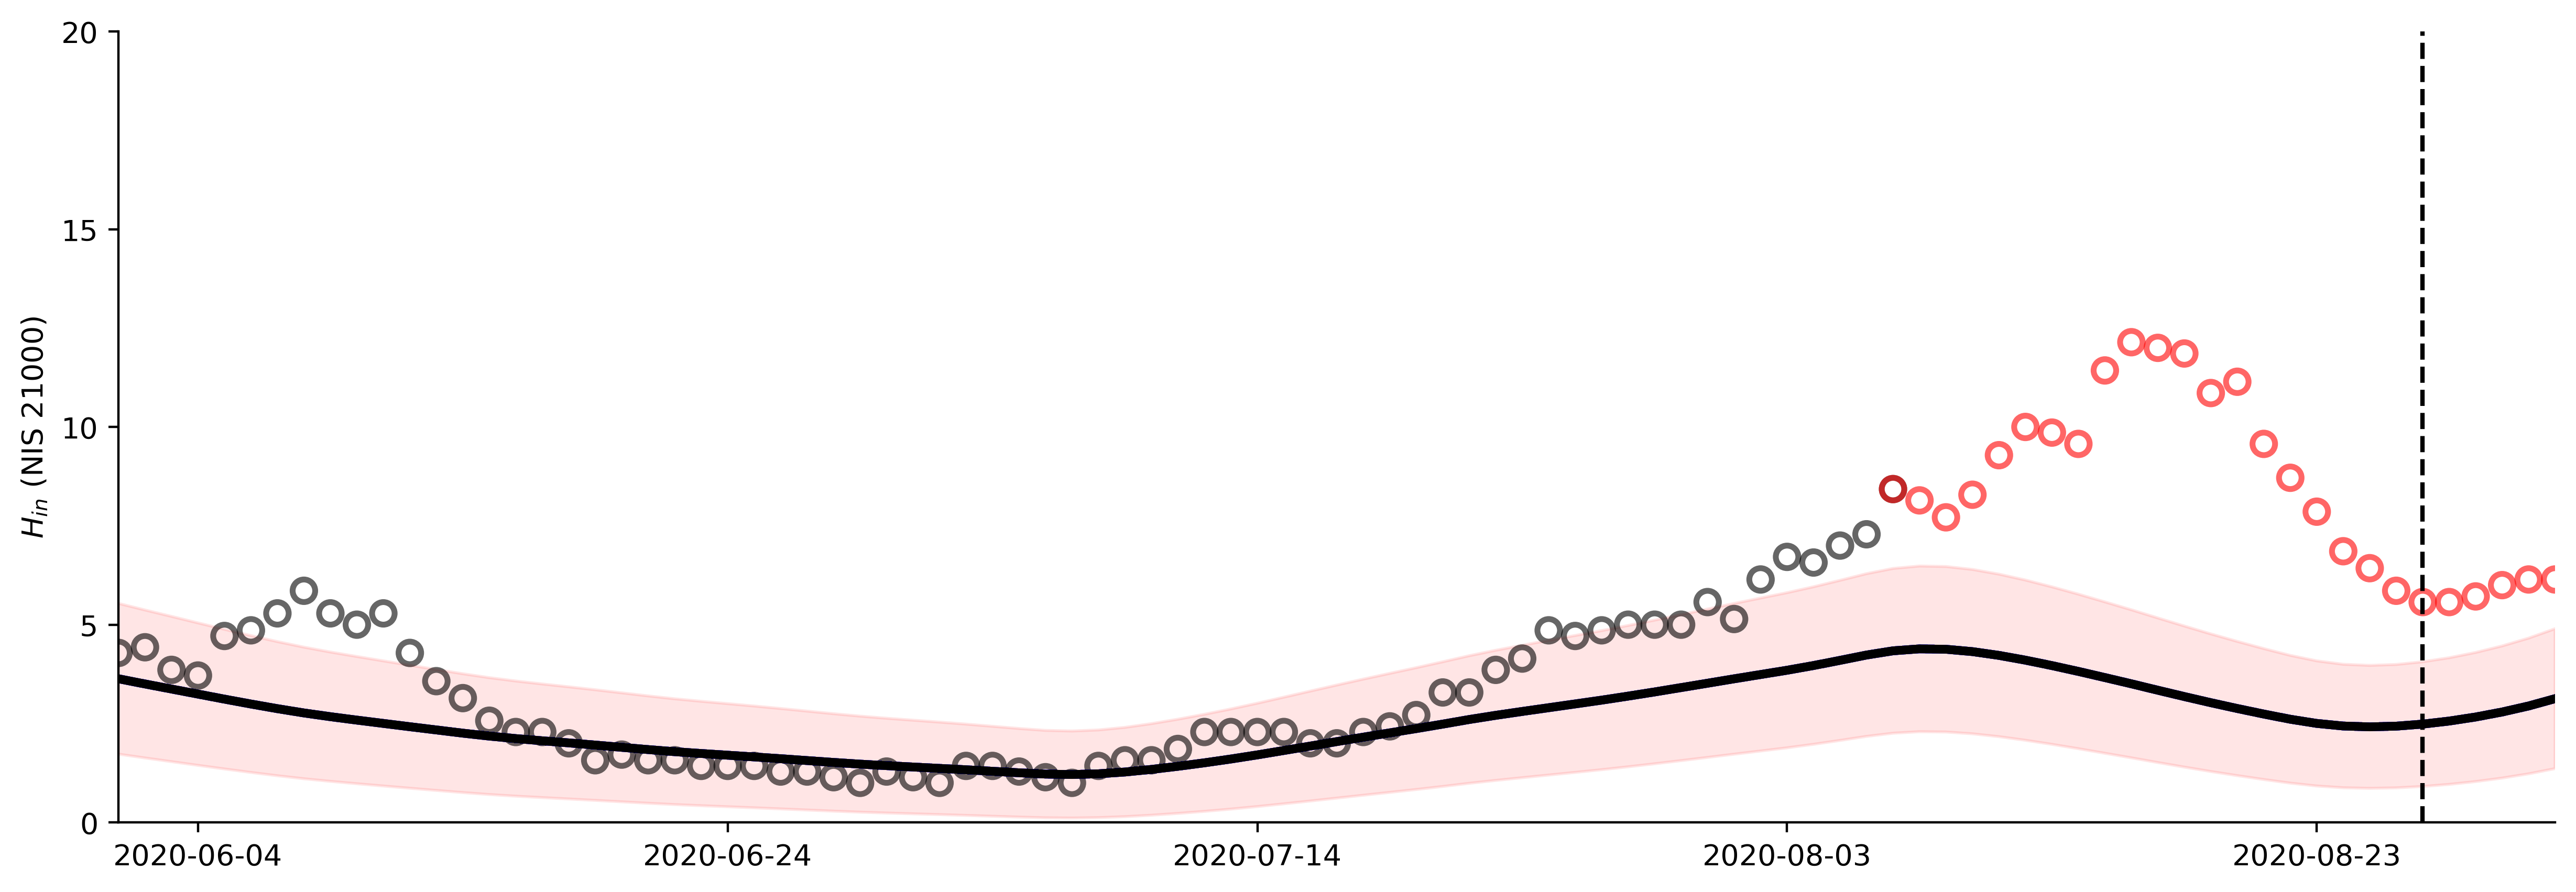

In [12]:
# The local data (Brussels) fit rather poorly

Image(filename='../calibration/summer-bump_21000.png')

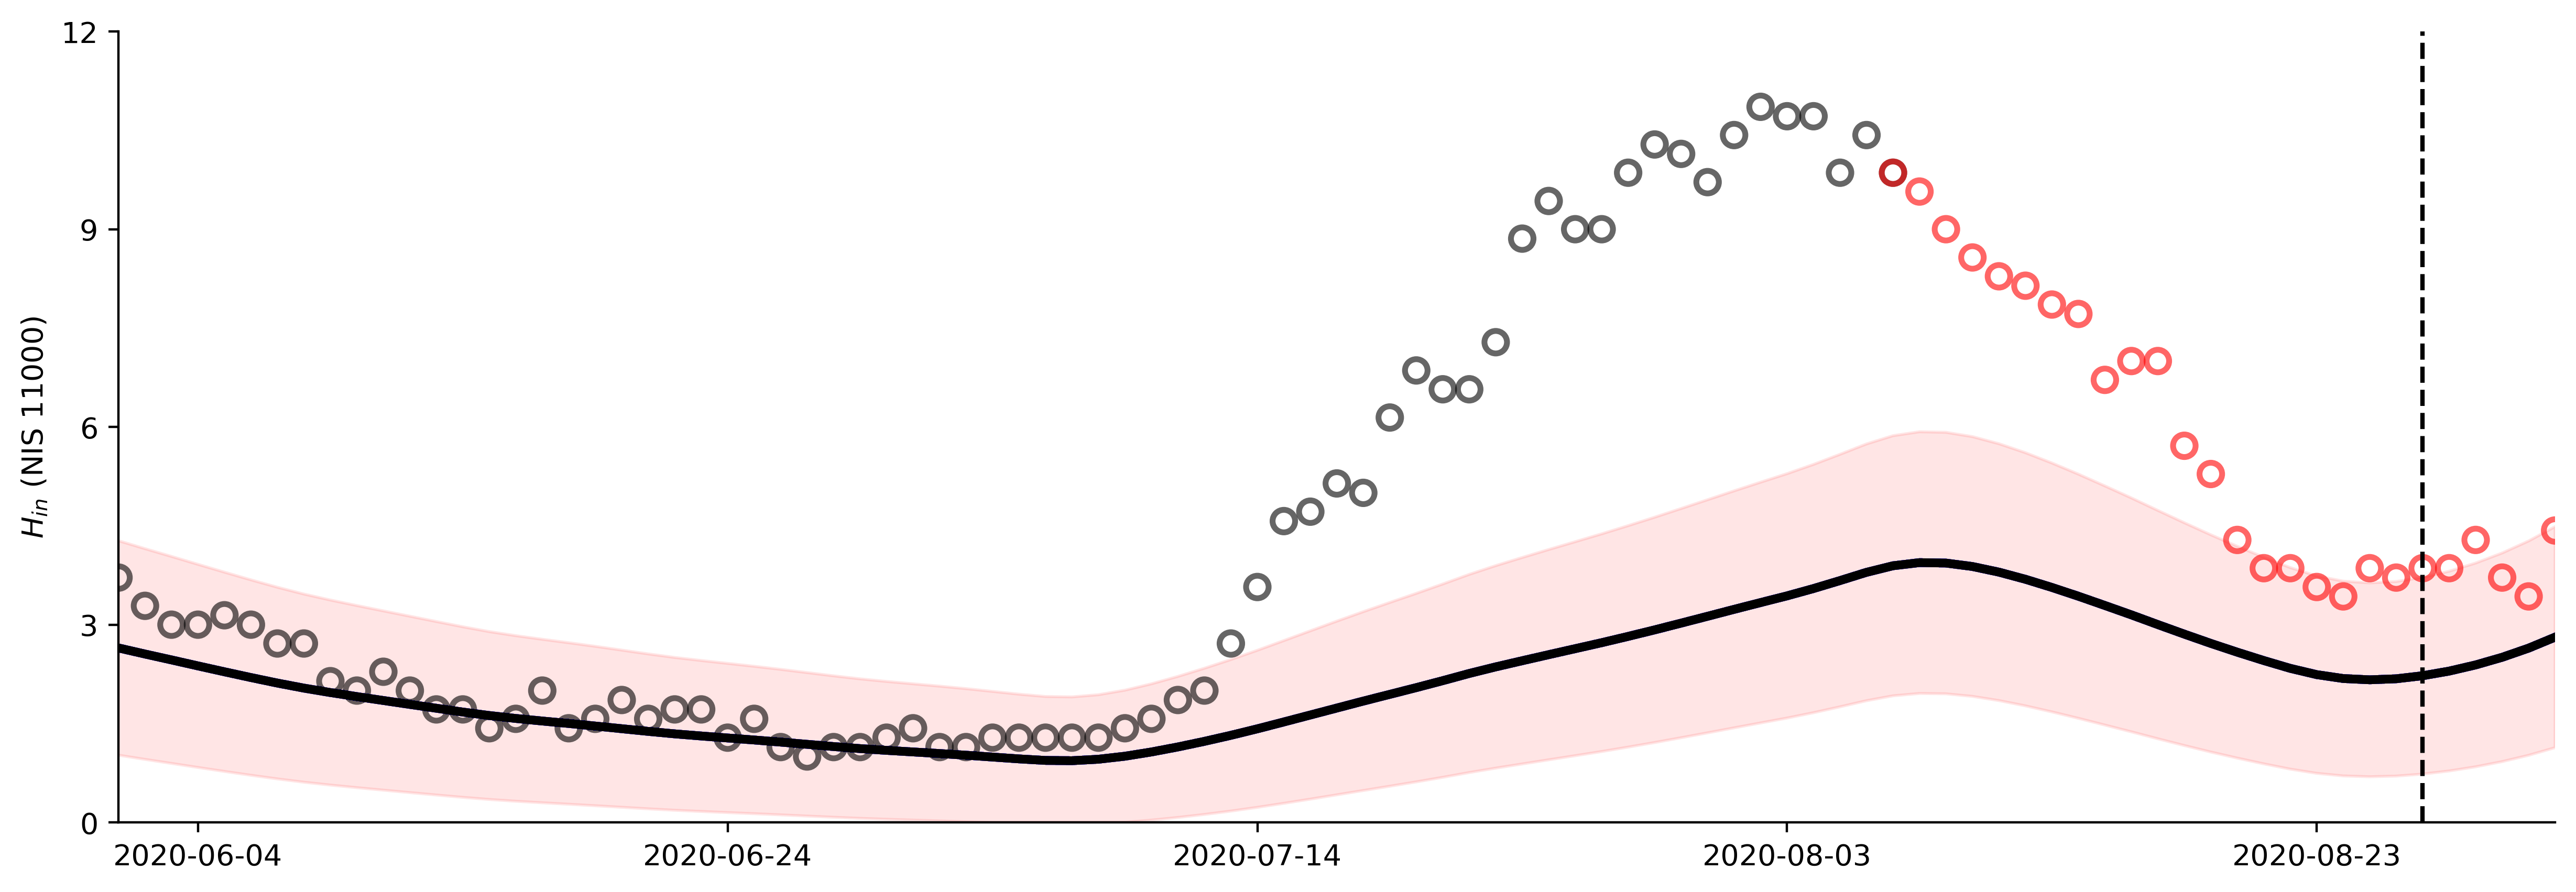

In [13]:
# The local data (Antwerp) fit rather poorly

Image(filename='../calibration/summer-bump_11000.png')

In order to create a proper calibration starting at the dashed vertical line in the figures above, it is particularly important to have the fit line pass the data _at that point_. This is very neatly the case for the nationally aggregated data/simulation, but not at all for the local time series.

This needs to be addressed, if we desire to initiate a good calibration for the ascending part of the future wave. The reason for that is easily understood: if the initial condition contains significantly fewer hospitalised subjects, an acceptable fit can only be achieved if the simulation line is 'brought up' by favouring a high transmission rate constant $\beta$. This high $\beta$ will then result in extrapolations (predictions) that far surpass the actual data. See below:

In [ ]:
Image(filename='../calibration/summer-bump_11000.png')

In [ ]:
# Load packages
# Established packages
import os
import numpy as np
import matplotlib.pyplot as plt

# Custom package covid19model
from covid19model.models import models
from covid19model.data import model_parameters, mobility #, sciensano, google
from covid19model.visualization.output import population_status, infected, show_map, show_graphs
from covid19model.models.time_dependant_parameter_fncs import * # lockdown_func, mobility_update_func, policies_wave1_4prev

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
# This may be useful because the `covid19model` package is under construction
%autoreload 2

# Spatial stratification
agg = 'arr'